In [14]:
# Install, import libraries
import sys
!{sys.executable} -m pip install python-dotenv pandas pydap geopandas

import geopandas as gpd
import pandas as pd
from pydap.client import open_url
from pydap.cas.urs import setup_session

%load_ext dotenv
%dotenv
from os import environ

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [23]:
datasets = [ ## TODO automate the consturction of this list
    "2020/oco2_LtCO2_200101_B9003r_200204190325s.nc4",
    "2020/oco2_LtCO2_200102_B9003r_200204190440s.nc4",
    "2020/oco2_LtCO2_200103_B9003r_200204190754s.nc4",
    "2020/oco2_LtCO2_200108_B9003r_200204190946s.nc4",
    "2020/oco2_LtCO2_200109_B9003r_200204191010s.nc4",
    "2020/oco2_LtCO2_200110_B9003r_200204191136s.nc4",
    "2020/oco2_LtCO2_200111_B9003r_200204191415s.nc4",
    "2020/oco2_LtCO2_200112_B9003r_200204191626s.nc4",
    "2020/oco2_LtCO2_200113_B9003r_200204191752s.nc4",
    "2020/oco2_LtCO2_200114_B9003r_200204192011s.nc4",
    "2020/oco2_LtCO2_200115_B9003r_200204192230s.nc4",
    "2020/oco2_LtCO2_200116_B9003r_200204192449s.nc4",
    "2020/oco2_LtCO2_200117_B9003r_200204192650s.nc4",
    "2020/oco2_LtCO2_200118_B9003r_200204192849s.nc4",
    "2020/oco2_LtCO2_200119_B9003r_200204193103s.nc4",
    "2020/oco2_LtCO2_200120_B9003r_200204193223s.nc4",
    "2020/oco2_LtCO2_200121_B9003r_200204193452s.nc4"
]

In [25]:
data = []
# Download OCO-2 C02 data
for i, path in enumerate(datasets):
    dataset_url = "https://oco2.gesdisc.eosdis.nasa.gov/opendap/OCO2_L2_Lite_FP.9r/" + path
    print(f"Loading dataset #{i} {dataset_url}")
    session = setup_session(environ.get("EARTHDATA_USER"), environ.get("EARTHDATA_PASS"), check_url=dataset_url)
    dataset = open_url(dataset_url, session=session)
    data += list(zip(dataset['latitude'], dataset['longitude'], dataset['xco2'], dataset['time'], dataset['vertex_latitude'], dataset['vertex_longitude']))

Loading dataset #0 https://oco2.gesdisc.eosdis.nasa.gov/opendap/OCO2_L2_Lite_FP.9r/2020/oco2_LtCO2_200101_B9003r_200204190325s.nc4
Loading dataset #1 https://oco2.gesdisc.eosdis.nasa.gov/opendap/OCO2_L2_Lite_FP.9r/2020/oco2_LtCO2_200102_B9003r_200204190440s.nc4
Loading dataset #2 https://oco2.gesdisc.eosdis.nasa.gov/opendap/OCO2_L2_Lite_FP.9r/2020/oco2_LtCO2_200103_B9003r_200204190754s.nc4
Loading dataset #3 https://oco2.gesdisc.eosdis.nasa.gov/opendap/OCO2_L2_Lite_FP.9r/2020/oco2_LtCO2_200108_B9003r_200204190946s.nc4
Loading dataset #4 https://oco2.gesdisc.eosdis.nasa.gov/opendap/OCO2_L2_Lite_FP.9r/2020/oco2_LtCO2_200109_B9003r_200204191010s.nc4
Loading dataset #5 https://oco2.gesdisc.eosdis.nasa.gov/opendap/OCO2_L2_Lite_FP.9r/2020/oco2_LtCO2_200110_B9003r_200204191136s.nc4
Loading dataset #6 https://oco2.gesdisc.eosdis.nasa.gov/opendap/OCO2_L2_Lite_FP.9r/2020/oco2_LtCO2_200111_B9003r_200204191415s.nc4
Loading dataset #7 https://oco2.gesdisc.eosdis.nasa.gov/opendap/OCO2_L2_Lite_FP.9r/

In [26]:
df = pd.DataFrame(data, columns=['latitude', 'longitude', 'xco2', 'time', 'vertex_latitude', 'vertex_longitude'])
gdf = gpd.GeoDataFrame(df['xco2'], geometry=gpd.points_from_xy(df.longitude, df.latitude))

df

,latitude,longitude,xco2,time,vertex_latitude,vertex_longitude
0,-63.118465,-144.780121,404.065430,1.577837e+09,"[-63.128063, -63.11009, -63.11152, -63.12949]","[-144.75716, -144.76743, -144.80132, -144.79108]"
1,-63.089653,-145.002289,406.500885,1.577837e+09,"[-63.099724, -63.081955, -63.083344, -63.101093]","[-144.97961, -144.98961, -145.02255, -145.0126]"
2,-63.053177,-144.988388,407.557800,1.577837e+09,"[-63.063282, -63.045532, -63.046917, -63.064663]","[-144.96591, -144.97589, -145.00949, -144.99954]"
3,-63.029068,-144.831039,407.300293,1.577837e+09,"[-63.038544, -63.020763, -63.02221, -63.03999]","[-144.80824, -144.81836, -144.85211, -144.84201]"
4,-63.030582,-144.864288,406.024719,1.577837e+09,"[-63.04029, -63.02251, -63.02396, -63.041744]","[-144.84172, -144.85182, -144.88574, -144.87566]"
...,...,...,...,...,...,...
2221168,44.070023,42.003639,411.497894,1.579601e+09,"[44.07043, 44.08712, 44.074257, 44.05816]","[42.002075, 41.993763, 42.00984, 42.01828]"
2221169,44.045357,42.035866,415.062500,1.579601e+09,"[44.045803, 44.061504, 44.049114, 44.031418]","[42.03437, 42.02584, 42.042286, 42.050335]"
2221170,44.030285,42.051235,415.458527,1.579601e+09,"[44.03068, 44.048775, 44.036312, 44.01472]","[42.04958, 42.041622, 42.057682, 42.064827]"
2221171,44.073792,42.011307,411.719696,1.579601e+09,"[44.07417, 44.09056, 44.077953, 44.062115]","[42.009796, 42.001396, 42.01744, 42.02596]"


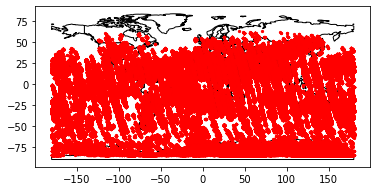

In [27]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

base = world.plot(color='white', edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=5);